<img src="./images/banner.png" width="800">

# Feature Engineering: Extraction

Feature extraction is a dimensionality reduction technique that transforms raw data from its original high-dimensional space into a lower-dimensional space while preserving the most important information. It's a crucial step in the machine learning pipeline, especially when dealing with complex, high-dimensional datasets.


<img src="./images/feature-extraction-2.webp" width="400">

🔑 **Key Concept:** Feature extraction creates new features by combining or transforming the original features, often resulting in a more compact and informative representation of the data.


<img src="./images/feat-extraction.png" width="800">

The importance of feature extraction in machine learning cannot be overstated:

1. **Dimensionality Reduction:** High-dimensional data can lead to the "curse of dimensionality," where the performance of machine learning algorithms degrades as the number of features increases. Feature extraction helps mitigate this by reducing the number of features while retaining most of the relevant information.

2. **Improved Model Performance:** By focusing on the most informative aspects of the data, feature extraction can lead to improved model accuracy and generalization.

3. **Computational Efficiency:** Reduced dimensionality means fewer computations, leading to faster training and prediction times.

4. **Noise Reduction:** Feature extraction can help separate signal from noise, focusing on the most important patterns in the data.

5. **Visualization:** Reducing data to two or three dimensions allows for effective visualization of high-dimensional datasets.


💡 **Pro Tip:** When dealing with image or signal processing tasks, feature extraction is often essential to transform raw pixel or time series data into a more meaningful representation for machine learning algorithms.


While both feature extraction and feature selection aim to reduce dimensionality, they approach the task differently:

**Feature Extraction:**
- Creates new features by combining or transforming original features
- The resulting features are often not directly interpretable in terms of the original features
- Typically reduces dimensionality more dramatically than feature selection
- Examples: PCA, LDA, Autoencoders

**Feature Selection:**
- Selects a subset of the original features without transformation
- Maintains the original meaning and interpretability of the selected features
- Useful when understanding the importance of specific original features is crucial
- Examples: Correlation-based selection, Recursive Feature Elimination


Here's a table summarizing the key differences:

| Aspect | Feature Extraction | Feature Selection |
|--------|---------------------|-------------------|
| Output | New features | Subset of original features |
| Interpretability | Often less interpretable | Maintains original feature interpretability |
| Dimensionality Reduction | Can achieve significant reduction | Reduction limited by original feature count |
| Information Preservation | Combines information from multiple features | May lose information from unselected features |
| Use Case | When overall patterns are more important than individual features | When specific feature importance is crucial |


Understanding the difference between feature extraction and selection helps you choose the appropriate technique for your specific problem. If interpretability of individual features is crucial, feature selection might be preferable. If you're more concerned with overall patterns and are dealing with very high-dimensional data, feature extraction could be more suitable.


❗️ **Important Note:** The choice between feature extraction and selection (or using both) often depends on the specific requirements of your problem, the nature of your data, and the machine learning algorithm you're using.


In the following sections, we'll dive deeper into various feature extraction techniques, exploring how they work and when to apply them. By mastering these methods, you'll be equipped to handle complex, high-dimensional datasets more effectively in your machine learning projects.

**Table of contents**<a id='toc0_'></a>    
- [Principal Component Analysis (PCA)](#toc1_)    
  - [Theory and Mathematics behind PCA](#toc1_1_)    
  - [Implementing PCA with scikit-learn](#toc1_2_)    
  - [Interpreting PCA Results](#toc1_3_)    
- [Linear Discriminant Analysis (LDA)](#toc2_)    
  - [LDA Concept and How it Differs from PCA](#toc2_1_)    
  - [Implementing LDA for Feature Extraction](#toc2_2_)    
  - [Interpreting LDA Results](#toc2_3_)    
- [t-SNE (t-Distributed Stochastic Neighbor Embedding)](#toc3_)    
  - [How t-SNE Works:](#toc3_1_)    
- [Applying t-SNE for Dimensionality Reduction and Visualization](#toc4_)    
  - [Advantages and Limitations of t-SNE:](#toc4_1_)    
- [Best Practices for Using t-SNE](#toc5_)    
- [Autoencoders for Feature Extraction](#toc6_)    
  - [Structure of an Autoencoder:](#toc6_1_)    
  - [(Optional) Building and Training an Autoencoder for Feature Extraction](#toc6_2_)    
  - [Advantages and Limitations of Autoencoders for Feature Extraction](#toc6_3_)    
  - [Best Practices for Using Autoencoders](#toc6_4_)    
- [Evaluating Extracted Features](#toc7_)    
  - [Reconstruction Error](#toc7_1_)    
  - [Explained Variance Ratio (for PCA)](#toc7_2_)    
  - [Silhouette Score](#toc7_3_)    
  - [Downstream Task Performance](#toc7_4_)    
  - [Visualizing High-Dimensional Data After Extraction](#toc7_5_)    
    - [Scatter Plots (for 2D or 3D)](#toc7_5_1_)    
    - [t-SNE for Higher Dimensions](#toc7_5_2_)    
    - [Pairwise Feature Plots](#toc7_5_3_)    
    - [Heatmaps](#toc7_5_4_)    
  - [Best Practices for Evaluating Extracted Features](#toc7_6_)    
- [Summary and Next Steps](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Principal Component Analysis (PCA)](#toc0_)


Principal Component Analysis (PCA) is a fundamental technique in feature extraction and dimensionality reduction. It falls into the following categories:
- Linear method
- Unsupervised method
- Projection-based method


PCA is a linear method because it assumes linear relationships between features. It's unsupervised because it doesn't require labeled data or a target variable. As a projection-based method, PCA works by projecting the data onto a new coordinate system.


🔑 **Key Concept:** Projection-based methods, like PCA, transform data into a new space by projecting it onto a set of basis vectors. In contrast, manifold learning methods (which we'll cover later) attempt to discover the underlying structure of the data, often preserving local relationships.


### <a id='toc1_1_'></a>[Theory and Mathematics behind PCA](#toc0_)


PCA aims to find a new set of orthogonal axes (principal components) that capture the maximum variance in the data. Here's how it works:

1. **Centering the data:** Subtract the mean of each feature from the data points.

2. **Computing the covariance matrix:** Calculate the covariance between each pair of features.

3. **Eigendecomposition:** Find the eigenvectors and eigenvalues of the covariance matrix.

4. **Selecting principal components:** The eigenvectors become the new axes, ordered by their corresponding eigenvalues (which represent the amount of variance explained).

5. **Projecting the data:** Transform the original data onto the new coordinate system defined by the selected principal components.


The principal components in PCA are calculated through a series of mathematical steps. Here's a simplified explanation of the process:

1. Data Preparation:
   - Start with a dataset of n observations and p variables.
   - Center the data by subtracting the mean of each variable from its values.

2. Covariance Matrix:
   - Calculate the covariance matrix of the centered data.
   - This matrix shows how each variable relates to every other variable.

3. Eigenvalue Decomposition:
   - Perform eigenvalue decomposition on the covariance matrix.
   - This yields eigenvectors and corresponding eigenvalues.

4. Sorting Eigenvectors:
   - Sort the eigenvectors by their corresponding eigenvalues in descending order.
   - The eigenvector with the largest eigenvalue is the first principal component, the second largest is the second principal component, and so on.

5. Forming Principal Components:
   - These sorted eigenvectors are the principal components.
   - Each eigenvector represents a direction in the feature space along which the data varies the most.

6. Projecting Data:
   - Project the original data onto these principal components to transform it into the new space.

The mathematics behind this process involves linear algebra concepts such as matrix operations, eigenvalues, and eigenvectors. **The goal is to find the directions (eigenvectors) that maximize the variance of the projected data**, with the amount of variance captured represented by the corresponding eigenvalues.

Mathematically, for a data matrix X, PCA finds a transformation matrix W such that:

- **Z = XW**

Where Z is the transformed data, and the columns of W are the principal components.


<img src="./images/pca.jpg" width="600">

### <a id='toc1_2_'></a>[Implementing PCA with scikit-learn](#toc0_)


Let's implement PCA on a real dataset. We'll use the Wine dataset from scikit-learn, which has 13 features.


In [1]:
# %pip install numpy matplotlib scikit-learn
# %pip install jinja2  # for styling the pandas dataframe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

In [4]:
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [5]:
df = pd.concat(
    [pd.DataFrame(X, columns=wine.feature_names), pd.Series(y, name="target")], axis=1
)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'Wine Dataset: First Two Principal Components')

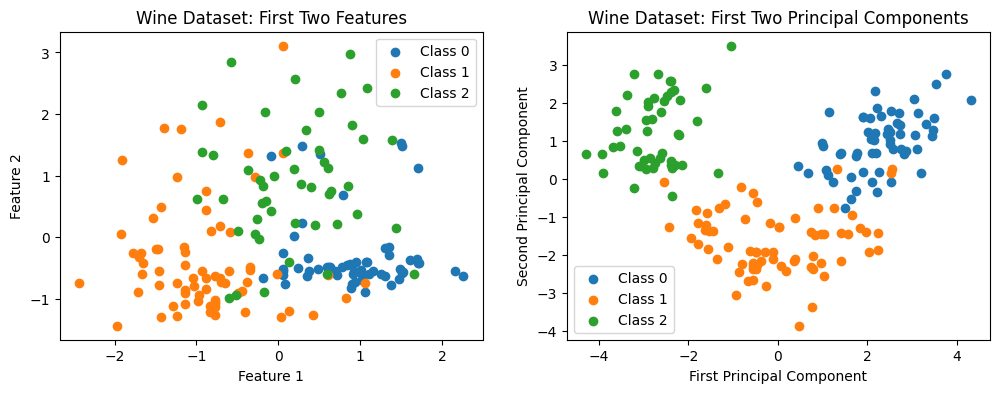

In [8]:
# Plot the first two principal components
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for i in range(3):
    axs[0].scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], label=f"Class {i}")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[0].legend()
axs[0].set_title("Wine Dataset: First Two Features")

# Plot the first two principal components
plt.subplot(1, 2, 2)
for i in range(3):
    axs[1].scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f"Class {i}")
axs[1].set_xlabel("First Principal Component")
axs[1].set_ylabel("Second Principal Component")
axs[1].legend()
axs[1].set_title("Wine Dataset: First Two Principal Components")

Text(0.5, 1.0, 'Explained Variance Ratio vs. Number of Components')

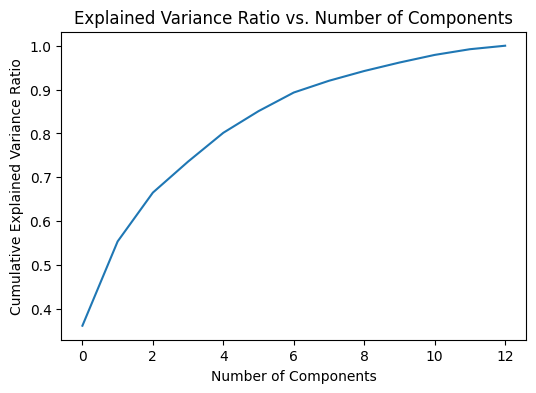

In [9]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of Components")

### <a id='toc1_3_'></a>[Interpreting PCA Results](#toc0_)


1. **Explained Variance Ratio:** This tells us how much of the total variance in the data is explained by each principal component.


In [10]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


2. **Cumulative Explained Variance:** We can use this to decide how many components to keep.


In [11]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

Number of components explaining 95% of variance: 10


3. **Component Loadings:** These show how much each original feature contributes to each principal component.


In [12]:
component_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=wine.feature_names,
)
print("Component loadings:")
component_loadings.style.highlight_max(
    axis=0, props="background-color: green; color: black"
)

Component loadings:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,0.483652,-0.207383,-0.017856,-0.265664,0.213539,-0.056396,0.396139,-0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,0.224931,0.089013,0.536890,0.035214,0.536814,0.420524,0.065827,0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,0.316069,0.626224,-0.214176,-0.143025,0.154475,-0.149171,-0.170260,0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,-0.010591,0.612080,0.060859,0.066103,-0.100825,-0.286969,0.427970,-0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,0.299634,0.130757,-0.351797,0.727049,0.038144,0.322883,-0.156361,-0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,0.065040,0.146179,0.198068,-0.149318,-0.084122,-0.027925,-0.405934,-0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,-0.003360,0.150682,0.152295,-0.109026,-0.018920,-0.060685,-0.187245,-0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,0.028779,0.170368,-0.203301,-0.500703,-0.258594,0.595447,-0.233285,-0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,0.039302,0.149454,0.399057,0.136860,-0.533795,0.372139,0.368227,0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,0.529996,-0.137306,0.065926,-0.076437,-0.418644,-0.227712,-0.033797,-0.056218,-0.290775,0.031839,0.604222,-0.011993


4. **Visualization:** The scatter plot of the first two principal components shows how well PCA separates the classes.


💡 **Pro Tip:** While PCA is great for dimensionality reduction, it doesn't always provide the best separation for classification tasks, as it's an unsupervised method that doesn't consider class labels.


PCA can significantly reduce the dimensionality of your data while retaining most of the important information. This can lead to faster training times and reduced overfitting in machine learning models.


❗️ **Important Note:** Always scale your features before applying PCA. Different scales can lead to principal components that don't accurately reflect the true structure of your data.


In this example, we've seen how PCA can reduce a 13-dimensional dataset to just 2 dimensions while still preserving much of the structure in the data. The scatter plot shows that even with just two principal components, we can see some separation between the three classes of wine.

To learn more about PCA, you can watch this video: [StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ)

## <a id='toc2_'></a>[Linear Discriminant Analysis (LDA)](#toc0_)

Linear Discriminant Analysis (LDA) is another powerful technique for feature extraction and dimensionality reduction. It falls into the following categories:
- Linear method
- Supervised method
- Projection-based method


Like PCA, LDA is a linear method that projects data onto a new coordinate system. However, unlike PCA, LDA is a supervised method, meaning it uses class label information to guide the feature extraction process. As a projection-based method, LDA seeks to find a linear combination of features that characterizes or separates two or more classes.


<img src="./images/lda.webp" width="400">

<img src="./images/lda.png" width="600">

LDA produces new features through a process that transforms the original feature space. Here's how it works:

1. Compute Class Statistics:
   - Calculate the mean vector for each class.
   - Compute the overall mean vector across all classes.

2. Calculate Scatter Matrices:
   - Within-class scatter matrix: Measures the spread of samples around their respective class means.
   - Between-class scatter matrix: Measures the spread of the class means around the overall mean.

3. Solve Eigenvalue Problem:
   - Compute the matrix product of the inverse of the within-class scatter matrix and the between-class scatter matrix.
   - Find the eigenvectors and eigenvalues of this matrix product.

4. Select Discriminant Vectors:
   - Sort the eigenvectors by their corresponding eigenvalues in descending order.
   - Select the top k eigenvectors, where k is typically the number of classes minus one (for multi-class problems) or 1 (for binary classification).

5. Create Transformation Matrix:
   - Form a matrix using these selected eigenvectors as columns.

6. Project Data:
   - Multiply the original data by this transformation matrix to project it onto the new feature space.

The resulting features (often called discriminant functions or canonical variables) are linear combinations of the original features. Each new feature is designed to maximize the separation between classes while minimizing the variation within classes.


These new features have several key properties:
- They are orthogonal (perpendicular) to each other.
- They are ranked in order of their ability to discriminate between classes.
- The number of new features is at most the number of classes minus one.


By projecting the data onto these new features, LDA effectively creates a new coordinate system that is optimized for class separation, often making classification tasks easier in this transformed space.

### <a id='toc2_1_'></a>[LDA Concept and How it Differs from PCA](#toc0_)


While both LDA and PCA are linear transformation techniques, their objectives differ:

1. **Objective:**
   - PCA aims to find the axes that maximize the variance in the data.
   - LDA aims to find the axes that maximize the separation between classes.

2. **Supervision:**
   - PCA is unsupervised and does not use class labels.
   - LDA is supervised and explicitly uses class label information.

3. **Optimization Criterion:**
   - PCA maximizes the variance of the projected data.
   - LDA maximizes the ratio of between-class variance to within-class variance.

4. **Number of Components:**
   - PCA can produce as many components as the original features.
   - LDA can produce at most C-1 components, where C is the number of classes.


🔑 **Key Concept:** LDA tries to find a feature subspace that maximizes class separability, making it particularly useful for classification tasks.


### <a id='toc2_2_'></a>[Implementing LDA for Feature Extraction](#toc0_)


Let's implement LDA on the Wine dataset and compare it with PCA:


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)

# Apply PCA for comparison
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

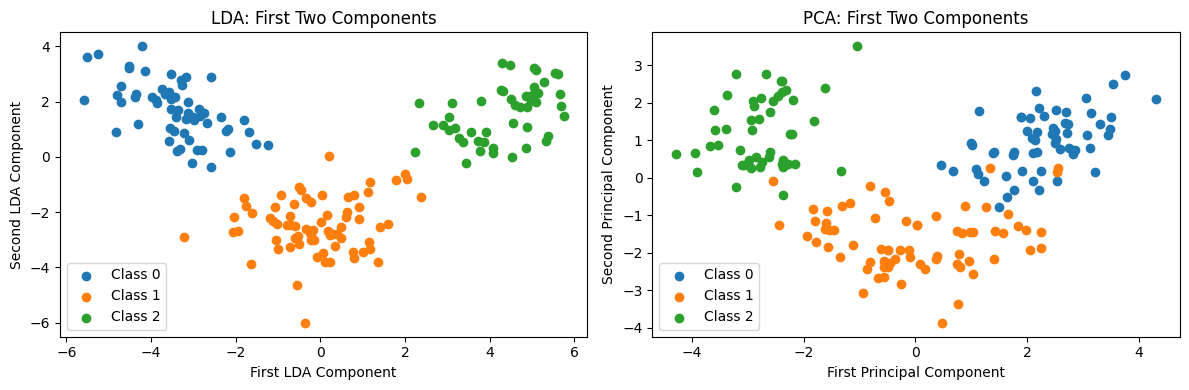

In [14]:
# Plot LDA vs PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

for i in range(3):
    ax1.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=f"Class {i}")
ax1.set_xlabel("First LDA Component")
ax1.set_ylabel("Second LDA Component")
ax1.legend()
ax1.set_title("LDA: First Two Components")

for i in range(3):
    ax2.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f"Class {i}")
ax2.set_xlabel("First Principal Component")
ax2.set_ylabel("Second Principal Component")
ax2.legend()
ax2.set_title("PCA: First Two Components")

plt.tight_layout()

In [15]:
# Print explained variance ratio for LDA
print("LDA explained variance ratio:", lda.explained_variance_ratio_)

LDA explained variance ratio: [0.68747889 0.31252111]


In [16]:
# Print explained variance ratio for PCA
print("PCA explained variance ratio:", pca.explained_variance_ratio_[:2])

PCA explained variance ratio: [0.36198848 0.1920749 ]


### <a id='toc2_3_'></a>[Interpreting LDA Results](#toc0_)


1. **Explained Variance Ratio:** This shows how much of the between-class variance is explained by each discriminant component.

2. **Visualization:** The scatter plot of the first two LDA components often shows better class separation compared to PCA, especially for classification tasks.

3. **Coefficients:** These show how each original feature contributes to each discriminant component.


In [17]:
lda_coefficients = pd.DataFrame(
    lda.scalings_,
    columns=[f"LD{i+1}" for i in range(lda.scalings_.shape[1])],
    index=wine.feature_names,
)
print("LDA coefficients:")
lda_coefficients.style.highlight_max(
    axis=0, props="background-color: green; color: black"
)

LDA coefficients:


,LD1,LD2
alcohol,-0.326569,0.705754
malic_acid,0.184094,0.340194
ash,-0.100969,0.641759
alcalinity_of_ash,0.515503,-0.487473
magnesium,-0.030813,-0.006591
total_phenols,0.385720,-0.020104
flavanoids,-1.654628,-0.490054
nonflavanoid_phenols,-0.185636,-0.202407
proanthocyanins,0.076533,-0.175270
color_intensity,0.820805,0.585410


💡 **Pro Tip:** LDA can be used both for dimensionality reduction and as a classifier. When used for classification, it assumes that the classes have equal covariance matrices and are normally distributed.


🤔 **Why This Matters:** LDA can provide better feature extraction for classification tasks compared to PCA because it explicitly considers class separation. This can lead to improved performance in downstream classification models.


❗️ **Important Note:** LDA requires at least two classes in the target variable. For binary classification problems, LDA will produce only one component.


In this example, we can see that LDA often provides better class separation than PCA when projecting the data onto two dimensions. This is because LDA uses the class information to find the most discriminative directions in the feature space.


However, it's important to remember that the effectiveness of LDA depends on the nature of your data. If the classes are not linearly separable or if they have very different covariance structures, LDA might not perform optimally. In such cases, you might need to consider non-linear dimensionality reduction techniques, which we'll explore in future sections.

## <a id='toc3_'></a>[t-SNE (t-Distributed Stochastic Neighbor Embedding)](#toc0_)

t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a powerful nonlinear dimensionality reduction technique particularly well-suited for visualizing high-dimensional data. Developed by Laurens van der Maaten and Geoffrey Hinton in 2008, t-SNE has become a go-to method for exploring and visualizing complex datasets.


<img src="./images/tsne-algorithm.webp" width="800">

🔑 **Key Concept:** t-SNE aims to preserve the local structure of the data in high-dimensional space when projecting it to a lower-dimensional space, typically 2D or 3D for visualization purposes.


### <a id='toc3_1_'></a>[How t-SNE Works:](#toc0_)


t-SNE algorithm looks for a mapping between the high-dimensional data and a low-dimensional embedding such that the similarity between points in the high-dimensional space is preserved in the low-dimensional space.

1. **Probability Distribution in High-Dimensional Space:**
   t-SNE starts by computing the probability of similarity between points in the high-dimensional space. For each pair of points, it calculates the conditional probability that a point would choose another point as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at the first point.

2. **Probability Distribution in Low-Dimensional Space:**
   It then constructs a similar probability distribution for the points in the low-dimensional space, using a Student t-distribution instead of a Gaussian.

3. **Minimizing Divergence:**
   The algorithm then minimizes the Kullback-Leibler divergence between these two distributions with respect to the locations of the points in the low-dimensional space. This process moves the points in the low-dimensional space to minimize this divergence, effectively preserving the local structure of the high-dimensional data.


💡 **Pro Tip:** The "perplexity" parameter in t-SNE is crucial. It can be interpreted as a smooth measure of the effective number of neighbors. The performance of t-SNE is fairly robust to changes in the perplexity, and typical values range from 5 to 50.


## <a id='toc4_'></a>[Applying t-SNE for Dimensionality Reduction and Visualization](#toc0_)


Let's apply t-SNE to a real dataset to see how it works in practice. We'll use the famous iris dataset for this example.


Text(0, 0.5, 't-SNE feature 2')

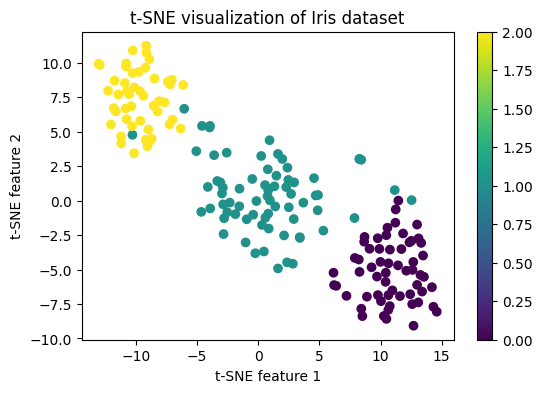

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the result
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis")
plt.colorbar(scatter)
plt.title("t-SNE visualization of Iris dataset")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")

This code will produce a 2D visualization of the iris dataset, where each point represents a flower and the colors represent different species.


🤔 **Why This Matters:** t-SNE is particularly effective at visualizing clusters or groups in high-dimensional data. It can reveal patterns that are not evident in other dimensionality reduction techniques like PCA.


### <a id='toc4_1_'></a>[Advantages and Limitations of t-SNE:](#toc0_)


t-SNE is a powerful tool for visualizing high-dimensional data, but it has some specific characteristics that make it particularly useful in certain scenarios:

1. **Preserves Local Structure:** t-SNE is particularly good at preserving the local structure of the data, making it excellent for visualizing clusters.

2. **Nonlinear:** Unlike PCA, t-SNE can capture nonlinear relationships in the data.

3. **Widely Applicable:** It can be applied to various types of high-dimensional data, from images to gene expression data.


However, t-SNE has some limitations:
1. **Computational Complexity:** t-SNE can be computationally expensive for large datasets.

2. **Non-deterministic:** Different runs can produce different results due to its stochastic nature.

3. **Difficulty in Interpreting Global Structure:** While t-SNE preserves local structure well, it may not always preserve global structure accurately.


❗️ **Important Note:** t-SNE is primarily used for visualization and exploration. It's not typically used for generating features for downstream machine learning tasks, unlike PCA or other feature extraction methods.


## <a id='toc5_'></a>[Best Practices for Using t-SNE](#toc0_)


1. **Preprocessing:** Normalize your data before applying t-SNE. This ensures that all features contribute equally to the distance calculations.

2. **Perplexity Tuning:** Experiment with different perplexity values. A good range to try is between 5 and 50.

3. **Multiple Runs:** Due to its stochastic nature, it's often beneficial to run t-SNE multiple times and compare the results.

4. **Combine with Other Methods:** Consider using t-SNE in conjunction with other dimensionality reduction techniques. For example, you might use PCA to reduce to an intermediate dimensionality before applying t-SNE.


In [19]:
from sklearn.decomposition import PCA

In [20]:
# First reduce to 50 dimensions with PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_pca.shape

(178, 10)

In [21]:
# Then apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)
X_tsne.shape

(178, 2)

By mastering t-SNE, you add a powerful tool to your feature extraction toolkit, particularly for visualizing and exploring high-dimensional datasets. Remember, while t-SNE is excellent for visualization, it's typically not used for generating features for predictive modeling. Instead, use it as part of your exploratory data analysis to gain insights into the structure of your data.

To learn more about how t-SNE works, you can watch this video: [t-SNE Clearly Explained](https://www.youtube.com/watch?v=NEaUSP4YerM)


## <a id='toc6_'></a>[Autoencoders for Feature Extraction](#toc0_)

Autoencoders are a type of artificial neural network used for unsupervised learning of efficient data codings. They are particularly powerful for feature extraction and dimensionality reduction tasks.


<img src="./images/autoencoder.png" width="800">

<img src="./images/autoencoder-image.png" width="800">

🔑 **Key Concept:** An autoencoder aims to learn a compressed representation (encoding) of the input data, which can then be used to reconstruct the original input as closely as possible.


### <a id='toc6_1_'></a>[Structure of an Autoencoder:](#toc0_)


1. **Encoder:** The part of the network that compresses the input into a latent-space representation.
2. **Bottleneck:** The layer with the compressed representation of the input data.
3. **Decoder:** The part that aims to reconstruct the input from the latent space representation.


The autoencoder is trained to minimize the reconstruction error, which forces it to learn the most important features of the data.


💡 **Pro Tip:** The bottleneck layer's size determines the degree of compression. A smaller bottleneck forces the network to learn a more compact representation.


### <a id='toc6_2_'></a>[(Optional) Building and Training an Autoencoder for Feature Extraction](#toc0_)


Let's walk through the process of building and training an autoencoder for feature extraction using TensorFlow and Keras. We'll use the MNIST dataset of handwritten digits as an example.

Note that this is an optional section as it includes a deep dive into neural networks, tensorflow, and keras. You will learn more about these topics in the Deep Learning course.


In [22]:
# %pip install tensorflow

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [24]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [25]:
# Define the autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 32  # Size of the encoded representation

In [26]:
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(encoded)
encoded = Dense(encoding_dim, activation="relu")(encoded)

decoded = Dense(64, activation="relu")(encoded)
decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)


In [27]:
# Create the autoencoder model
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [28]:
# Compile and train the autoencoder
autoencoder.compile(optimizer=Adam(), loss="binary_crossentropy")
history = autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3473 - val_loss: 0.1618
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1537 - val_loss: 0.1388
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1356 - val_loss: 0.1254
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1234 - val_loss: 0.1165
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1160 - val_loss: 0.1116
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1122 - val_loss: 0.1084
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1092 - val_loss: 0.1062
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1068 - val_loss: 0.1046
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1051 - val_loss: 0.1028
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1035 - val_loss: 0.1011
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1018 - val_loss: 0.1001
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [29]:
# Extract features using the trained encoder
encoded_imgs = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


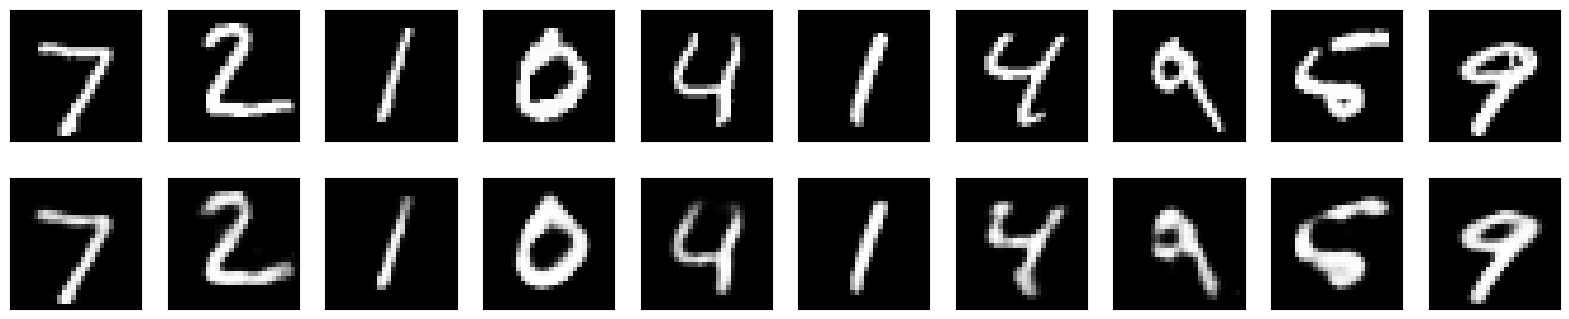

In [30]:
# Visualize the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder.predict(x_test[i].reshape(1, 784)).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


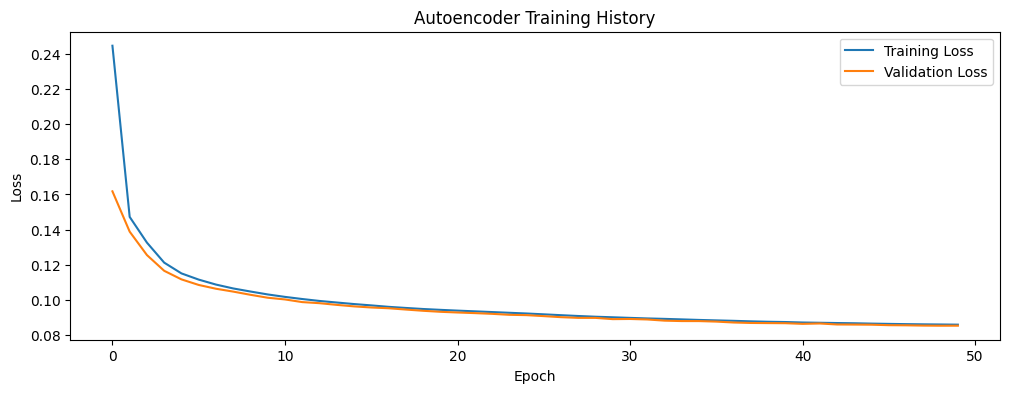

In [31]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Autoencoder Training History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

This code does the following:


1. Loads and preprocesses the MNIST dataset.
2. Defines an autoencoder architecture with an encoding dimension of 32.
3. Compiles and trains the autoencoder.
4. Uses the trained encoder to extract features from the test set.
5. Visualizes original and reconstructed images.
6. Plots the training history.


🤔 **Why This Matters:** Autoencoders can learn complex, nonlinear feature representations that capture the most important aspects of the data. These learned features can often outperform hand-crafted features or simpler dimensionality reduction techniques.


### <a id='toc6_3_'></a>[Advantages and Limitations of Autoencoders for Feature Extraction](#toc0_)

Autoencoders have several advantages:
1. **Nonlinear Dimensionality Reduction:** Autoencoders can capture complex, nonlinear relationships in the data.
2. **Unsupervised Learning:** They don't require labeled data for training.
3. **Flexibility:** The architecture can be adapted to various types of data (e.g., convolutional layers for images).
4. **Denoising:** Certain types of autoencoders (denoising autoencoders) can learn robust features by reconstructing clean inputs from noisy ones.

However, autoencoders also have some limitations:
1. **Computational Complexity:** Training deep autoencoders can be computationally intensive.
2. **Hyperparameter Tuning:** The performance depends on the architecture and hyperparameters chosen.
3. **Interpretability:** The learned features may not always be easily interpretable.


❗️ **Important Note:** The choice of the encoding dimension is crucial. Too small, and important information may be lost; too large, and the autoencoder might not learn a useful compression of the data.


### <a id='toc6_4_'></a>[Best Practices for Using Autoencoders](#toc0_)


1. **Data Preprocessing:** Normalize your data before feeding it into the autoencoder.
2. **Architecture Design:** Start with a simple architecture and gradually increase complexity if needed.
3. **Regularization:** Consider using techniques like dropout or L1/L2 regularization to prevent overfitting.
4. **Visualization:** Visualize the reconstructed outputs to ensure the autoencoder is learning meaningful representations.
5. **Experimentation:** Try different encoding dimensions and architectures to find the best representation for your specific task.


Autoencoders provide a powerful and flexible approach to feature extraction, capable of capturing complex patterns in various types of data. By mastering this technique, you can uncover hidden structures in your data and potentially improve the performance of your downstream machine learning tasks.

## <a id='toc7_'></a>[Evaluating Extracted Features](#toc0_)

After applying feature extraction techniques, it's crucial to assess the quality and effectiveness of the extracted features. This evaluation helps ensure that the new features capture the essential information from the original data and are useful for downstream tasks.


Several metrics and techniques can be used to evaluate the quality of extracted features:


### <a id='toc7_1_'></a>[Reconstruction Error](#toc0_)


For methods like autoencoders and PCA, reconstruction error measures how well the extracted features can reconstruct the original data.


```python
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming X is your original data and X_reconstructed is the data reconstructed from extracted features
reconstruction_error = mean_squared_error(X, X_reconstructed)
print(f"Reconstruction Error: {reconstruction_error}")
```


🔑 **Key Concept:** Lower reconstruction error indicates that the extracted features retain more information from the original data.


### <a id='toc7_2_'></a>[Explained Variance Ratio (for PCA)](#toc0_)


This metric shows the proportion of variance in the original data that is explained by each principal component.


```python
from sklearn.decomposition import PCA

pca = PCA().fit(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance Ratio:", cumulative_variance_ratio)
```


💡 **Pro Tip:** Plot the cumulative explained variance against the number of components to determine how many components are needed to explain a certain percentage of the variance.


### <a id='toc7_3_'></a>[Silhouette Score](#toc0_)


If you have labeled data, the silhouette score can measure how well the extracted features separate different classes.


In [32]:
from sklearn.metrics import silhouette_score

# Assuming X_extracted are your extracted features and y are the labels
silhouette_avg = silhouette_score(X_pca, y)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2000839829893727


In [33]:
silhouette_avg = silhouette_score(X_tsne, y)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.2586076855659485


### <a id='toc7_4_'></a>[Downstream Task Performance](#toc0_)


One of the most practical ways to evaluate extracted features is to use them in your intended machine learning task and compare the performance against using the original features.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train and evaluate with original features
svm_original = SVC().fit(X_train, y_train)
accuracy_original = accuracy_score(y_test, svm_original.predict(X_test))

# Train and evaluate with extracted features
svm_extracted = SVC().fit(X_train_pca, y_train_pca)
accuracy_extracted = accuracy_score(y_test_pca, svm_extracted.predict(X_test_pca))

print(f"Accuracy with original features: {accuracy_original}")
print(f"Accuracy with extracted features: {accuracy_extracted}")

Accuracy with original features: 0.8055555555555556
Accuracy with extracted features: 0.7777777777777778


🤔 **Why This Matters:** Improved performance on downstream tasks is often the ultimate goal of feature extraction.


### <a id='toc7_5_'></a>[Visualizing High-Dimensional Data After Extraction](#toc0_)


Visualization is a powerful tool for understanding the structure of your data after feature extraction. Here are some techniques:


#### <a id='toc7_5_1_'></a>[Scatter Plots (for 2D or 3D)](#toc0_)


If your extracted features are 2D or 3D, you can create simple scatter plots.


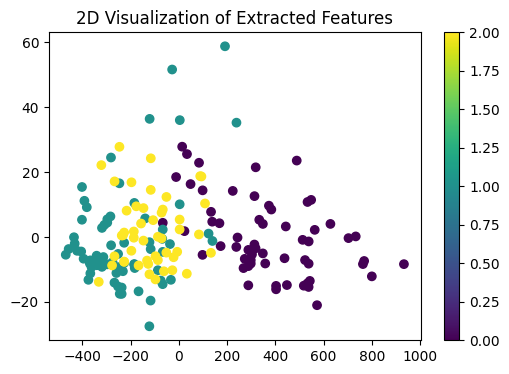

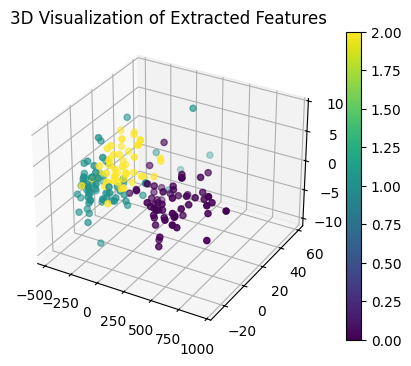

In [35]:
import matplotlib.pyplot as plt

# For 2D
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('2D Visualization of Extracted Features')
plt.show()

# For 3D
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('3D Visualization of Extracted Features')
plt.show()

#### <a id='toc7_5_2_'></a>[t-SNE for Higher Dimensions](#toc0_)


For higher-dimensional extracted features, t-SNE can be used to create a 2D or 3D visualization.


Text(0.5, 1.0, 't-SNE Visualization of Extracted Features')

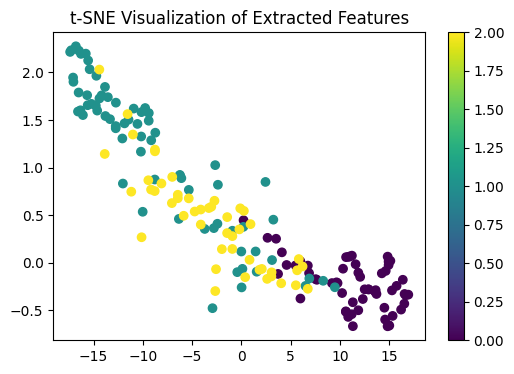

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Extracted Features')

#### <a id='toc7_5_3_'></a>[Pairwise Feature Plots](#toc0_)


For a moderate number of extracted features, pairwise plots can be informative.


In [37]:
import seaborn as sns

# Assuming X_extracted is a DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=[f"PC{i}" for i in range(X_tsne.shape[1])])
df_tsne['y'] = y

df_tsne

,PC0,PC1,y
0,11.326386,-0.667789,0
1,10.996623,0.065190,0
2,13.542080,-0.301189,0
3,16.394600,-0.179806,0
4,2.662922,0.261400,0
...,...,...,...
173,2.623563,-0.170500,2
174,3.054006,-0.144413,2
175,5.667188,-0.080280,2
176,5.837288,0.038036,2


Text(0.5, 1.02, 'Pairwise Plots of Extracted Features')

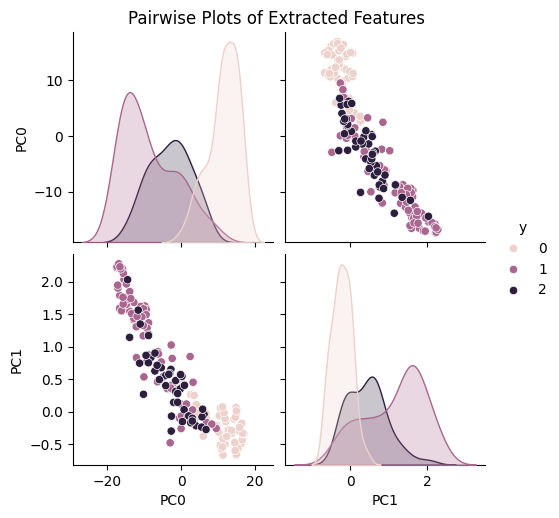

In [38]:
sns.pairplot(df_tsne, hue='y', diag_kind='kde')
plt.suptitle('Pairwise Plots of Extracted Features', y=1.02)

#### <a id='toc7_5_4_'></a>[Heatmaps](#toc0_)


Heatmaps can visualize the correlation between extracted features.


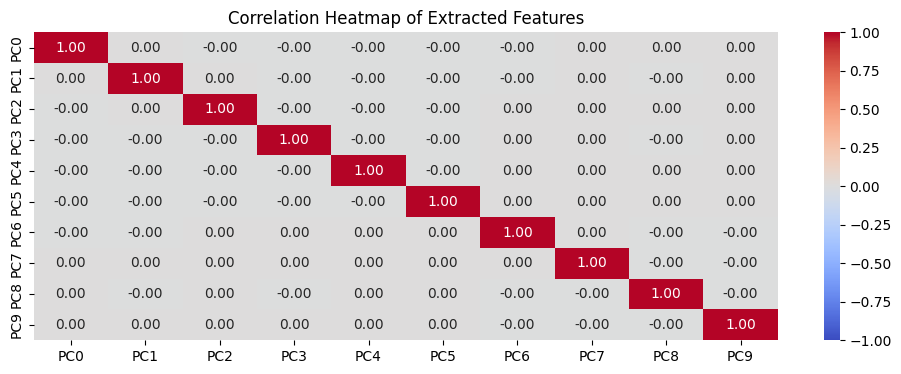

In [50]:
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(X_pca.shape[1])])
correlation_matrix = df_pca.corr()

plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Extracted Features')
plt.show()

❗️ **Important Note:** The choice of visualization technique depends on the number of extracted features and the specific insights you're seeking.


### <a id='toc7_6_'></a>[Best Practices for Evaluating Extracted Features](#toc0_)


1. **Use Multiple Metrics:** Don't rely on a single metric. Combine quantitative metrics with visualization techniques for a comprehensive evaluation.

2. **Compare with Original Features:** Always benchmark the performance of extracted features against the original features.

3. **Consider the End Goal:** Evaluate the features in the context of your specific machine learning task or analytical objective.

4. **Iterative Process:** Feature extraction is often iterative. Use these evaluation techniques to refine your extraction methods and parameters.

5. **Domain Knowledge:** Incorporate domain expertise in interpreting the results, especially when visualizing the extracted features.


By thoroughly evaluating your extracted features using these metrics and visualization techniques, you can ensure that your feature extraction process is effective and that the resulting features are well-suited for your machine learning tasks. Remember, the goal is not just dimensionality reduction, but creating a more informative and efficient representation of your data.

## <a id='toc8_'></a>[Summary and Next Steps](#toc0_)

In this lecture, we've explored various aspects of feature extraction, a crucial step in the machine learning pipeline. Let's recap the key points:

1. **Introduction to Feature Extraction**
   - We learned that feature extraction is about creating new features from existing ones, often reducing dimensionality while preserving important information.
   - We distinguished feature extraction from feature selection, understanding their different approaches to dimensionality reduction.

2. **Principal Component Analysis (PCA)**
   - We explored PCA as a linear dimensionality reduction technique that finds directions of maximum variance in the data.
   - We learned how to interpret and use explained variance ratios to choose the number of components.

3. **Linear Discriminant Analysis (LDA)**
   - We discovered LDA as a supervised technique that maximizes class separability.
   - We compared LDA to PCA, understanding when each is more appropriate.

4. **t-SNE**
   - We delved into t-SNE as a powerful visualization tool for high-dimensional data.
   - We learned about its ability to preserve local structure and reveal clusters in the data.

5. **Autoencoders**
   - We explored autoencoders as a non-linear feature extraction technique based on neural networks.
   - We learned how to build and train autoencoders for unsupervised feature learning.

6. **Evaluation of Extracted Features**
   - We discussed various metrics and visualization techniques to assess the quality of extracted features.
   - We emphasized the importance of evaluating features in the context of downstream tasks.

7. **Best Practices and Common Pitfalls**
   - We covered when to use different extraction techniques based on data characteristics and problem types.
   - We learned strategies to avoid overfitting in feature extraction and common pitfalls to watch out for.


Feature extraction is a powerful tool that can significantly improve model performance and data understanding, but it requires careful application and evaluation.


💡 **Pro Tip:** Keep a journal of your experiments with different feature extraction techniques. Note what works well and what doesn't for different types of data and problems. This personal knowledge base will be invaluable as you tackle more complex projects.


Remember, mastering feature extraction is an ongoing process. It requires not only theoretical understanding but also practical experience and intuition. As you continue to apply these techniques, you'll develop a deeper understanding of when and how to use different methods effectively.


❗️ **Important Note:** Always stay curious and open to learning. The field of machine learning and data science is rapidly evolving, and new techniques for feature extraction and representation learning are constantly being developed.


By following these next steps, you'll be well on your way to becoming proficient in feature extraction and enhancing your overall machine learning skillset. Good luck on your learning journey!